In [2]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\fe-na\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\fe-na\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\fe-na\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\fe-na\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\fe-na\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import statistics


In [48]:
api = wandb.Api()
Baseline = api.runs(f"causalpaca/emulator", filters = {'group' : "Baseline", 'tags': "36_models"})
print(len(Baseline))
Model_36= api.runs(f"causalpaca/emulator", filters =  {'group' : "Final", 'tags': "36_models"})
Pin_Memory_data = api.runs("causalpaca/emulator", filters={"group": "Pin_Memory"})
A100_data = api.runs("causalpaca/emulator", filters={"group": "A100"})
BatchSize = api.runs("causalpaca/emulator", filters={"$or": [{"group": "BatchSize_climax_frozen"},{"group": "BatchSize_climax"},{"group": "BatchSize_unet"},{"group": "BatchSize_convlstm"}]})
# BatchSize_climax_data = api.runs("causalpaca/emulator", filters={"group": "BatchSize_climax"})
# BatchSize_unet_data = api.runs("causalpaca/emulator", filters={"group": "BatchSize_unet"})
# BatchSize_convlstm_data = api.runs("causalpaca/emulator", filters={"group": "BatchSize_convlstm"})
Baseline_data_6 = api.runs("causalpaca/emulator", filters={"group": "Baseline", 'tags': "6_models"})
Baseline_data_36 = api.runs("causalpaca/emulator", filters={"group": "Baseline", 'tags': "36_models"})

NW = api.runs("causalpaca/emulator", filters={"$or": [{"group": "NW_convlstm"},{"group": "NW_climax_frozen"},{"group": "NW_climax"},{"group": "NW_climax_unet"}]})
# NW_convlstm_data = api.runs("causalpaca/emulator", filters={"group": "NW_convlstm"})
# NW_climax_frozen_data = api.runs("causalpaca/emulator", filters={"group": "NW_climax_frozen"})
# NW_climax_data = api.runs("causalpaca/emulator", filters={"group": "NW_climax"})
# NW_climax_unet_data = api.runs("causalpaca/emulator", filters={"group": "NW_climax_unet"})
Final_data = api.runs("causalpaca/emulator", filters={"group": "Final","tags":"Final"})
Models_97_data = api.runs("causalpaca/emulator", filters={"group": "97_Models"})
MPT_data = api.runs("causalpaca/emulator", filters={"group": "MPT"})
Shuffle_data = api.runs("causalpaca/emulator", filters={"group": "Shuffle"})
    # BatchSize_climax_frozen_data,
    # BatchSize_climax_data,
    # BatchSize_unet_data,
    # BatchSize_convlstm_data,
Treatments = [
    Pin_Memory_data,
    A100_data,
    BatchSize,
    Baseline_data_6,
    Baseline_data_36,
    # NW_convlstm_data,
    # NW_climax_frozen_data,
    # NW_climax_data,
    # NW_climax_unet_data,
    NW,
    Final_data,
    MPT_data,
    Shuffle_data
]
Treatment_Names = ["Pin_Memory_6","A100_6","BatchSize_6","Baseline_6","Baseline_36","NW_6","Final_36",
                   "MPT_6","Shuffle_6"]

8


In [49]:
def filter_system_metrics(system_metrics, filter_criteria):
    """
    Filters system metrics based on specified criteria.
    """
    filtered_columns = [metric[0] for metric in filter_criteria]

    return system_metrics[filtered_columns]


data = []
for index, treatment in enumerate(Treatments):
  emissions_mean = {"name": f"{Treatment_Names[index]}","runtime":0,f"Power_KWH":0,f"Mean_CO2":0,f"Cumulative_CO2":0,f"Cumulative_Power":0}
  for model in treatment:
      # Fetching metrics for the specified run
      try: 
        name = model.config["model"]["model_name"]
        emissions = model.summary["emissions"]

      except:
        name = model.config["model/model_name"]
        emissions = model.summary["emissions"]


      # Retrieving system metrics history
      system_metrics = model.history(stream="systemMetrics")
      filter_criteria = [
          ['system.gpu.process.0.powerWatts'],
      ]
      # Filtering system metrics based on the specified criteria
      system_metrics_filtered = filter_system_metrics(system_metrics, filter_criteria)

      defaults = model.history()
      runtime_hours = model.summary["_wandb"].runtime /60/60
      emissions_mean["runtime"] = runtime_hours
      emissions_mean[f"Mean_CO2"] += emissions*100
      power = statistics.mean(system_metrics_filtered['system.gpu.process.0.powerWatts'].dropna().to_list())
      emissions_mean[f"Power_KWH"] += (power/1000)*runtime_hours
      
  emissions_mean[f"Cumulative_CO2"] = emissions_mean[f"Mean_CO2"]
  emissions_mean[f"Cumulative_Power"] = emissions_mean[f"Power_KWH"]
  emissions_mean[f"Power_KWH"] = emissions_mean[f"Power_KWH"]/len(Treatments[index])
  emissions_mean[f"Mean_CO2"] = emissions_mean[f"Mean_CO2"]/len(Treatments[index])
  data.append(emissions_mean)
  print(emissions_mean)

{'name': 'Pin_Memory_6', 'runtime': 4.094444444444444, 'Power_KWH': 0.3714415217748417, 'Mean_CO2': 0.14097000478162536, 'Cumulative_CO2': 1.1277600382530029, 'Cumulative_Power': 2.9715321741987335}
{'name': 'A100_6', 'runtime': 4.049722222222222, 'Power_KWH': 0.30881737284438143, 'Mean_CO2': 0.13137824865131903, 'Cumulative_CO2': 1.0510259892105522, 'Cumulative_Power': 2.4705389827550515}
{'name': 'BatchSize_6', 'runtime': 0.21638888888888888, 'Power_KWH': 0.305564115678672, 'Mean_CO2': 0.11455801517601279, 'Cumulative_CO2': 3.665856485632409, 'Cumulative_Power': 9.778051701717503}
{'name': 'Baseline_6', 'runtime': 2.776111111111111, 'Power_KWH': 0.37851558698237503, 'Mean_CO2': 0.14061585451018138, 'Cumulative_CO2': 1.124926836081451, 'Cumulative_Power': 3.0281246958590002}
{'name': 'Baseline_36', 'runtime': 20.947499999999998, 'Power_KWH': 2.1765187738599465, 'Mean_CO2': 0.8532293186979666, 'Cumulative_CO2': 6.825834549583733, 'Cumulative_Power': 17.412150190879572}
{'name': 'NW_6',

C:\Users\fe-na\AppData\Local\Temp\ipykernel_7572\4084945005.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fe-na\AppData\Local\Temp\ipykernel_7572\4084945005.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fe-na\AppData\Local\Temp\ipykernel_7572\4084945005.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fe-na\AppData\Local\Temp\ipykernel_7572\4084945005.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, horizontalalignment='right')


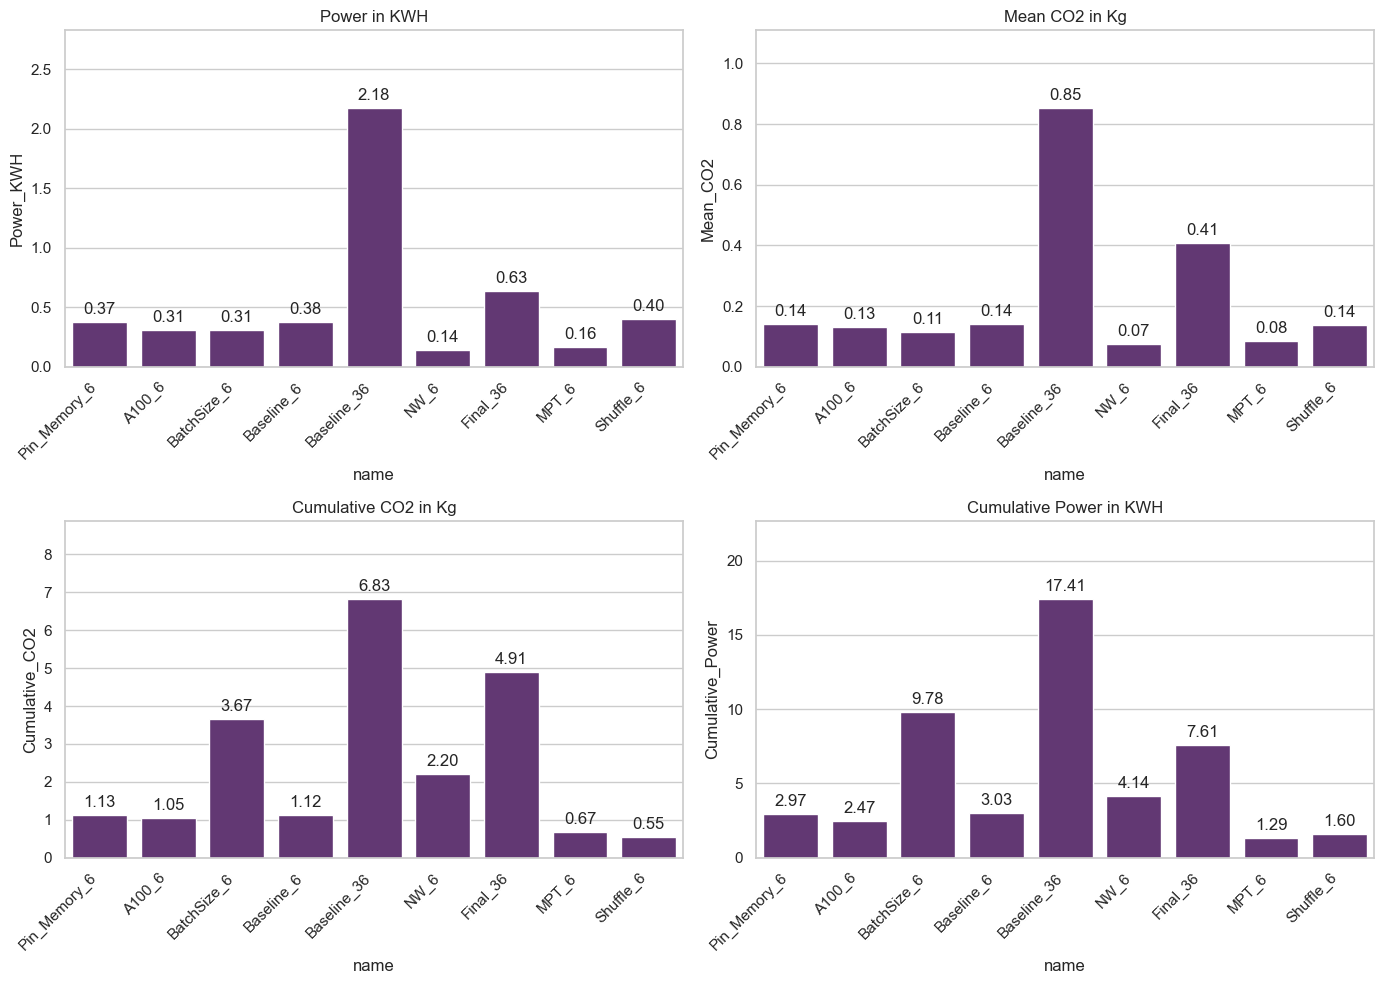

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Define a function to add values on top of the bars
def add_values(ax, feature):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Plot 1: Power_KWH
max_pkwh = df['Power_KWH'].max()
sns.barplot(x='name', y='Power_KWH', data=df, ax=axs[0, 0], color='#662E7D')
axs[0, 0].set_title('Power in KWH')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
add_values(axs[0, 0], 'Power_KWH')
axs[0, 0].set_ylim(0, max_pkwh * 1.3)


# Plot 2: Mean_CO2
max_pkwh = df['Mean_CO2'].max()
sns.barplot(x='name', y='Mean_CO2', data=df, ax=axs[0, 1], color='#662E7D')
axs[0, 1].set_title('Mean CO2 in Kg')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
add_values(axs[0, 1], 'Mean_CO2')
axs[0, 1].set_ylim(0, max_pkwh * 1.3)


# Plot 3: Cumulative_CO2
max_pkwh = df['Cumulative_CO2'].max()
sns.barplot(x='name', y='Cumulative_CO2', data=df, ax=axs[1, 0], color='#662E7D')
axs[1, 0].set_title('Cumulative CO2 in Kg')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, horizontalalignment='right')
add_values(axs[1, 0], 'Cumulative_CO2')
axs[1, 0].set_ylim(0, max_pkwh * 1.3)


# Plot 4: Cumulative_Power
max_pkwh = df['Cumulative_Power'].max()
sns.barplot(x='name', y='Cumulative_Power', data=df, ax=axs[1, 1], color='#662E7D')
axs[1, 1].set_title('Cumulative Power in KWH')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, horizontalalignment='right')
add_values(axs[1, 1], 'Cumulative_Power')
axs[1, 1].set_ylim(0, max_pkwh * 1.3)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("figures/RQ_4_combined_bar/sustainability_combined.png")

# Show the plots
plt.show()